In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
x = 6 * np.random.rand(100,1) -3  
y = 0.5 * x**2 + 1.5*x + 2 + np.random.rand(100,1)

# quadratic equation used y = 0.5 x^2 + 1.5 x + 2 + outliers

Text(0, 0.5, 'Y dataset')

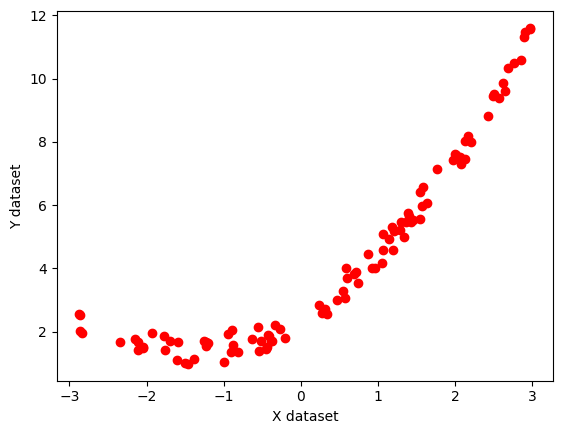

In [20]:
plt.scatter(x,y,color='r')
plt.xlabel('X dataset')
plt.ylabel('Y dataset')

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [22]:
from sklearn.linear_model import LinearRegression
model_1 = LinearRegression()

In [23]:
model_1.fit(X_train,Y_train)

LinearRegression()

In [26]:
from sklearn.metrics import r2_score
score = r2_score(Y_test,model_1.predict(X_test))
print(score)

0.8209054219194557


Text(0, 0.5, 'y')

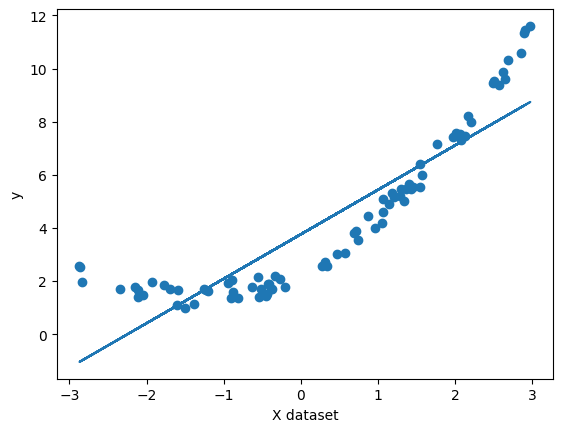

In [36]:
## lets visualize this model

plt.plot(X_train,model_1.predict(X_train))
plt.scatter(X_train,Y_train)
plt.xlabel('X dataset')
plt.ylabel('y')

In [38]:
# Lets apply POLYNOMIAL Transformation 

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2,include_bias=True)

In [40]:
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [ ]:
X_train_poly  # 1, x1 , x1 sqaure

array([[ 1.        ,  1.76082439,  3.10050255],
       [ 1.        , -0.51793049,  0.26825199],
       [ 1.        ,  2.12610617,  4.52032744],
       [ 1.        , -1.19901189,  1.43762952],
       [ 1.        ,  2.9075921 ,  8.45409185],
       [ 1.        , -2.14732545,  4.61100658],
       [ 1.        ,  0.30764921,  0.09464804],
       [ 1.        ,  0.57118913,  0.32625702],
       [ 1.        , -1.68962072,  2.85481819],
       [ 1.        , -1.61108824,  2.5956053 ],
       [ 1.        ,  1.3989864 ,  1.95716294],
       [ 1.        , -0.89351649,  0.79837172],
       [ 1.        , -0.27373861,  0.07493283],
       [ 1.        , -1.771831  ,  3.13938508],
       [ 1.        , -1.38572126,  1.92022341],
       [ 1.        , -1.23165077,  1.51696361],
       [ 1.        ,  1.29017107,  1.66454138],
       [ 1.        ,  2.06228967,  4.25303868],
       [ 1.        ,  2.61717278,  6.84959334],
       [ 1.        , -0.55483826,  0.3078455 ],
       [ 1.        ,  1.57190239,  2.470

In [42]:
from sklearn.metrics import r2_score
regression = LinearRegression()
regression.fit(X_train_poly, Y_train)
y_pred = regression.predict(X_test_poly)
score=r2_score(Y_test,y_pred)
print(score)

0.9916360673233432


In [ ]:
print(regression.coef_) ## for three features, three coefficient

[[0.         1.47414831 0.52958742]]


In [ ]:
print(regression.intercept_)  # only one intercept

[2.39208349]


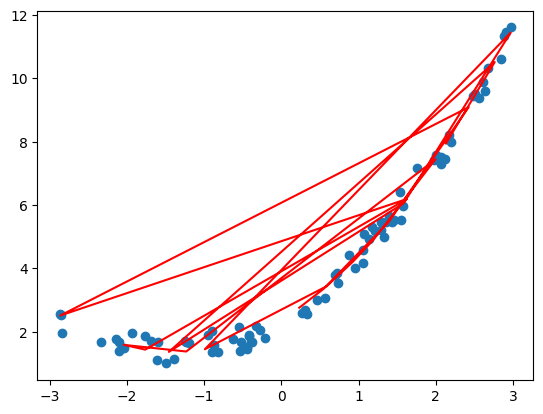

In [45]:
plt.scatter(X_train,Y_train)
plt.plot(X_test,y_pred,color='r')

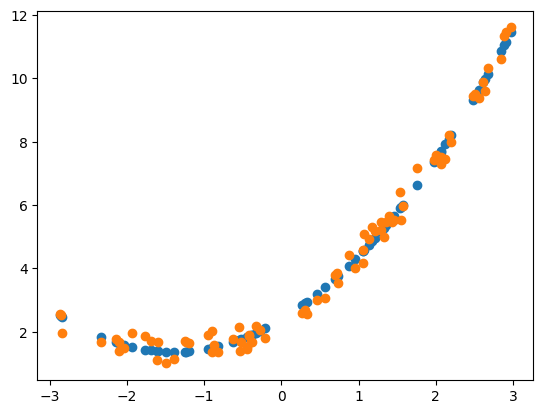

In [47]:
plt.scatter(X_train,regression.predict(X_train_poly))
plt.scatter(X_train,Y_train)

In [ ]:
## What if i make the degree value as three??

poly = PolynomialFeatures(degree=3,include_bias=True)  ## four features
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [49]:
from sklearn.metrics import r2_score
regression = LinearRegression()
regression.fit(X_train_poly, Y_train)
y_pred = regression.predict(X_test_poly)
score=r2_score(Y_test,y_pred)
print(score)

0.9915788188405361


In [58]:
## Prediction for the new data

X_new = np.linspace(-3, 3, 200).reshape(200, 1)  ## linspcae -> for generating linearly spaced data
                                                ## here 200 datapoints between -3 to 3
X_new_poly = poly.transform(X_new)
X_new_poly

array([[ 1.00000000e+00, -3.00000000e+00,  9.00000000e+00, ...,
         5.31441000e+05, -1.59432300e+06,  4.78296900e+06],
       [ 1.00000000e+00, -2.96984925e+00,  8.82000455e+00, ...,
         4.70774416e+05, -1.39812905e+06,  4.15223249e+06],
       [ 1.00000000e+00, -2.93969849e+00,  8.64182723e+00, ...,
         4.16517714e+05, -1.22443650e+06,  3.59947412e+06],
       ...,
       [ 1.00000000e+00,  2.93969849e+00,  8.64182723e+00, ...,
         4.16517714e+05,  1.22443650e+06,  3.59947412e+06],
       [ 1.00000000e+00,  2.96984925e+00,  8.82000455e+00, ...,
         4.70774416e+05,  1.39812905e+06,  4.15223249e+06],
       [ 1.00000000e+00,  3.00000000e+00,  9.00000000e+00, ...,
         5.31441000e+05,  1.59432300e+06,  4.78296900e+06]],
      shape=(200, 15))

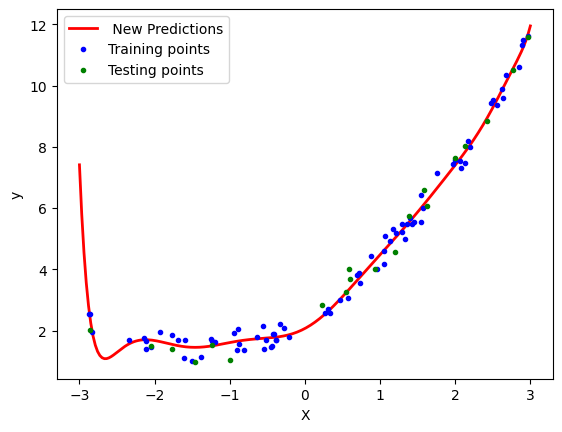

In [59]:
y_new = regression.predict(X_new_poly)
plt.plot(X_new, y_new, "r-", linewidth=2, label=" New Predictions")
plt.plot(X_train, Y_train, "b.",label='Training points')
plt.plot(X_test, Y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

### Pipeline Concepts

In [60]:
from sklearn.pipeline import Pipeline

In [71]:
def poly_regression(degree):
    X_new = np.linspace(-3, 3, 200).reshape(200, 1)
    
    poly_features=PolynomialFeatures(degree=degree,include_bias=True)
    lin_reg=LinearRegression()
    poly_regression=Pipeline([
        ("poly_features",poly_features),
        ("lin_reg",lin_reg)
    ])
    poly_regression.fit(X_train,Y_train) ## ploynomial and fit of linear reression
    y_pred_new=poly_regression.predict(X_new)
    #plotting prediction line
    plt.plot(X_new, y_pred_new,'r', label="Degree " + str(degree), linewidth=2)
    plt.plot(X_train, Y_train, "b.", linewidth=3)
    plt.plot(X_test, Y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-4,4, 0, 10])
    plt.show()

In [ ]:
'''
a "pipeline" in polynomial regression (or any other model) refers to a way to 
chain together multiple steps of data preprocessing and model fitting into a single, 
streamlined unit, which then functions as a composite estimator. 
'''

'\n'

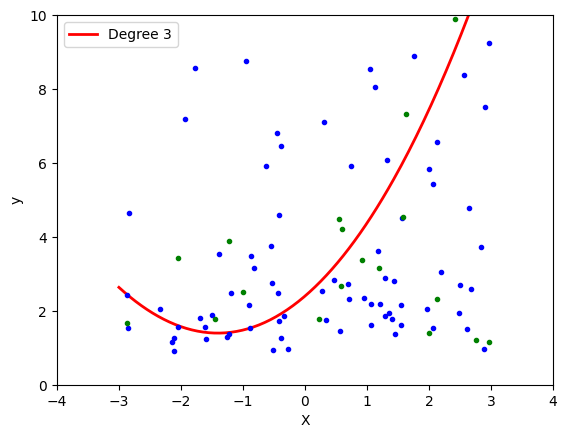

In [69]:
poly_regression(3)

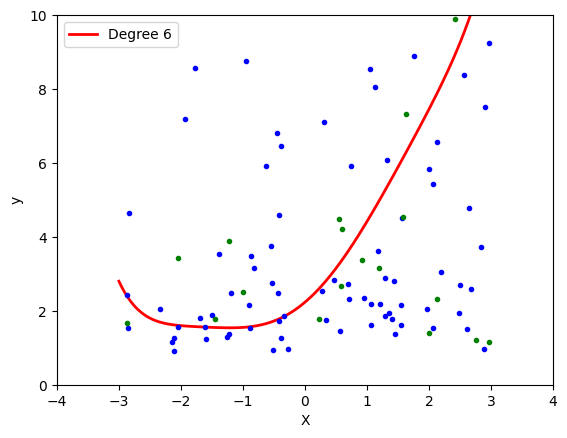

In [70]:
poly_regression(6)